In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings

In [2]:
warnings.filterwarnings('ignore')


---Model Evaluation ---
Training MSE: 6.048715742264576
Testing  MSE: 5.667989246087995
Training R²:  26.19954969964504
Testing  R²:  22.114194589238277
------------------------------


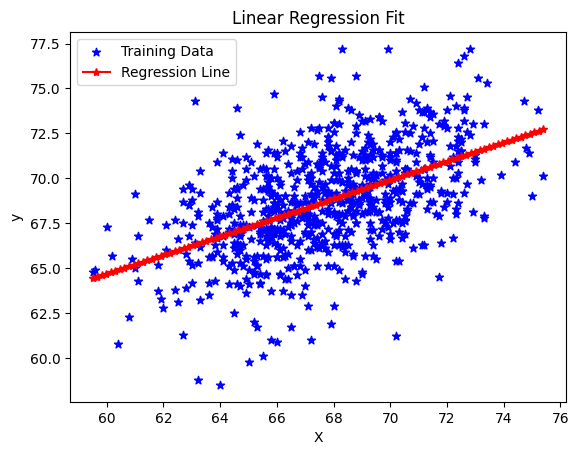

In [10]:
class SimpleLinearRegression():
  def __init__(self,test_size = 0.2,random_state = 42):
    #Store parameters
    self.test_size = test_size
    self.random_state = random_state
    #Creating untrained model
    self.model = LinearRegression()

    #Initialize attributes for the model
    self.X_train = None
    self.X_test = None
    self.y_train = None
    self.y_test = None

    self.train_mse = None
    self.train_r2 = None
    self.test_mse = None
    self.test_r2 = None
#Inserting data
  def load_data(self,path,x_col,y_col):
    df = pd.read_csv(path)
    X = df[[x_col]] # independent
    y = df[y_col]   #dependent
    #Splitiing the data to train and test
    self.X_train,self.X_test,self.y_train,self.y_test = train_test_split(X,y,test_size = self.test_size,random_state=self.random_state)

  #using fit() for model
  def fit(self):
    self.model.fit(self.X_train,self.y_train)

  def predict(self, X):
      return self.model.predict(X)

  #Evaluating Train,test data
  def mse(self, X, y):
        y_pred = self.predict(X)
        errors = (y - y_pred) ** 2
        mse_value = np.sum(errors) / len(X)
        return mse_value

    #Accuracy for train and test
  def accuracy(self, X, y):
        y_pred = self.predict(X)
        y_mean = np.mean(y)
        numerator = np.sum((y - y_pred) ** 2)
        denominator = np.sum((y - y_mean) ** 2)
        r2 = 1 - (numerator / denominator)
        return r2

  def evaluate(self):
        train_mse = self.mse(self.X_train, self.y_train)
        test_mse = self.mse(self.X_test, self.y_test)

        train_r2 = self.accuracy(self.X_train, self.y_train) * 100
        test_r2 = self.accuracy(self.X_test, self.y_test) *100

        print("\n---Model Evaluation ---")
        print(f"Training MSE: {train_mse}")
        print(f"Testing  MSE: {test_mse}")
        print(f"Training R²:  {train_r2}")
        print(f"Testing  R²:  {test_r2}")
        print("------------------------------")

  def plot_regression_fit(self):
        X_range = np.linspace(self.X_train.min(), self.X_train.max(), 100).reshape(-1, 1)
        y_range = self.model.predict(X_range)
        # Plot predicted line
        plt.scatter(self.X_train, self.y_train, color='blue', marker = '*',label='Training Data')
        plt.plot(X_range, y_range, color='red',marker = '*', label='Regression Line')
        plt.xlabel('X')
        plt.ylabel('y')
        plt.title('Linear Regression Fit')
        plt.legend()
        plt.show()



slr = SimpleLinearRegression(test_size=0.3, random_state=42)
slr.load_data(path='/content/Pearson.csv', x_col='Father', y_col='Son')
slr.fit()
slr.evaluate()
slr.plot_regression_fit()


In [17]:
y_pred = slr.model.predict([[67]])
print(y_pred)
#print(f"Predicted y for X = 67: {y_pred[0]}")

[68.34846826]


In [18]:
import pickle

In [19]:
with open('Pearson.pkl','wb') as f:
  pickle.dump(slr.model,f)

In [20]:
with open('Pearson.pkl','rb') as f:
  m = pickle.load(f)